# Kaggle "Home Credit Default Risk" コンペ


### 背景： 
Home Credit社は，銀行で融資を受けられない層を広げることに取り組んでおり，

様々なデータを使って，返済能力の予測が出来ないかと考えている．


### dataset:


1. HomeCredit_columns_description.csv

    - 各データファイルのカラムの説明
    
2. application_train/test.csv

    - これがメインのテーブル
    - 全てのクライアントの静的データ(属性データ)
    - 各行が，１つのデータサンプル

3. bureau.csv
    - Credit Bureau（という個人信用調査機関）によってレポートされている，他の金融機関におけるクライアントのcreditの情報

4. bureau_balance.csv
    - Credit Bureauによってレポートされている，以前のcreditの月次残高

5. credit_card_balance.csv
    - クライアントがHome Creditで持っていた過去のクレジットカードの月次残高のスナップショット

6. installments_payments.csv
    - 過去に支払われた

7. POS_CASH_balance.csv
    - クライアントがHome Creditで持っていた以前のPOSの月次残高のスナップショットと，現金ローン

8. previous_application.csv
    - 過去のHome Credit社のクライアント情報

9. sample_submission.csv
    - 提出ファイルのサンプル


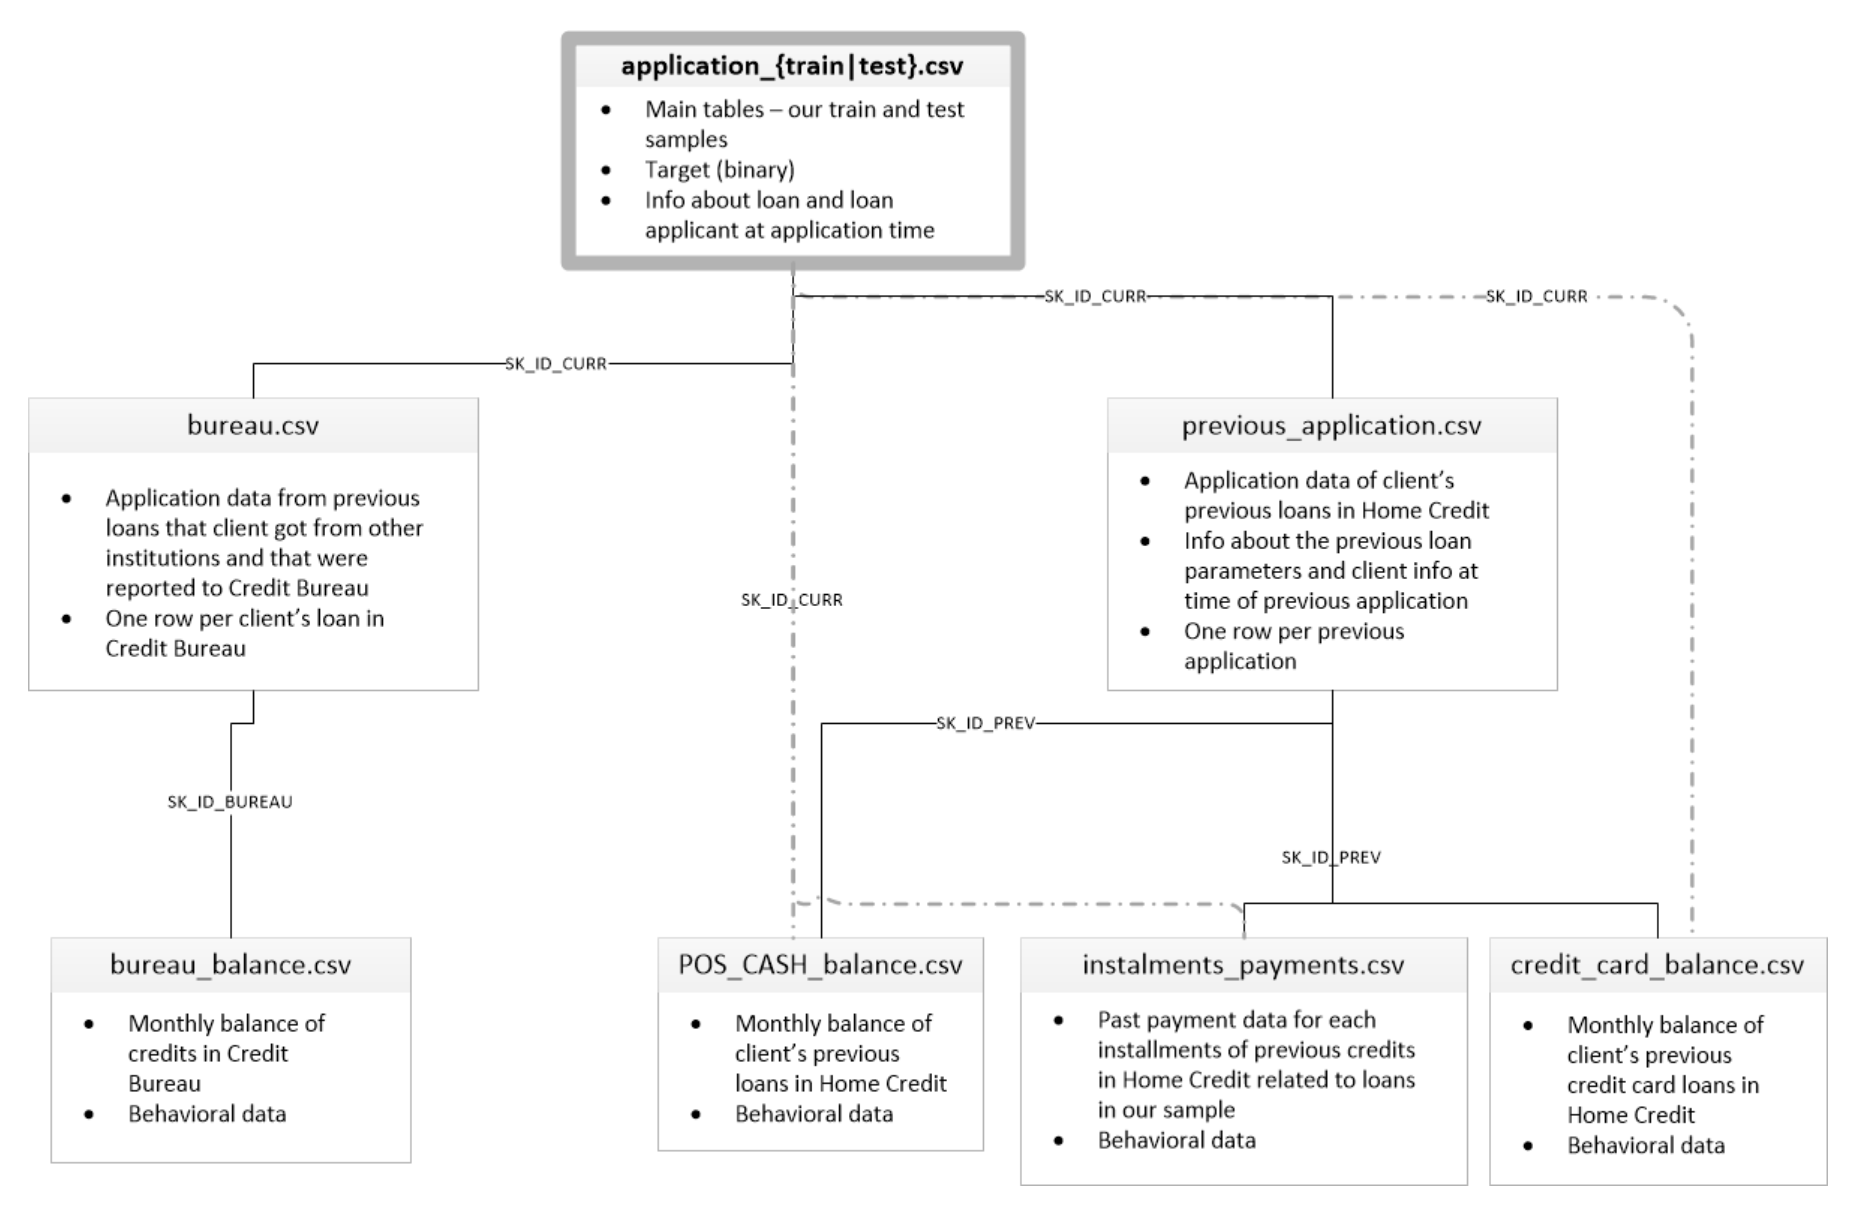

In [1]:
# 各ファイルは下記のようにIDを紐付けて考える
from IPython.display import Image, display_png
display_png(Image("pictures/relations_dataset.png"))

### 提出するもの

与えられたクライアントのデータ（application_test.csv）から，各クライアントがデフォルトする確率を予測

sample_submission.csvのように，１つ目のカラムにクライアントID, 2つ目のカラムにデフォルト確率を記載したcsvを提出

### データの中身

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200)  # jupyter notebook上で表示カラム数が省略されるのを防ぐ
from IPython.display import display

### HomeCredit_columns_description.csv

In [3]:
with open('data/HomeCredit_columns_description.csv', errors='ignore') as f:
    df_description = pd.read_csv(f, index_col=0, dtype='object')
df_description

# encodingの問題で， 下記だとエラー．．．
#df_description = pd.read_csv('data/HomeCredit_columns_description.csv', errors='ignore')

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


### application_train.csv

In [4]:
application_train = pd.read_csv('data/application_train.csv', dtype='object')
print(application_train.shape)
application_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08303696739132256,0.2629485927471776,0.13937578009978951,0.0247,0.0369,0.9722,0.6192,0.0143,0.0,0.069,0.0833,0.125,0.0369,0.0202,0.019,0.0,0.0,0.0252,0.0383,0.9722,0.6341,0.0144,0.0,0.069,0.0833,0.125,0.0377,0.022,0.0198,0.0,0.0,0.025,0.0369,0.9722,0.6243,0.0144,0.0,0.069,0.0833,0.125,0.0375,0.0205,0.0193,0.0,0.0,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003540999999999999,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.3112673113812225,0.6222457752555098,NaN,0.0959,0.0529,0.9851,0.7959999999999999,0.0605,0.08,0.0345,0.2917,0.3333,0.013,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.804,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.5559120833904428,0.7295666907060153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
# 各カラムの説明
df_description[df_description['Table']=='application_{train|test}.csv']

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


### bureau.csv

In [6]:
bureau = pd.read_csv('data/bureau.csv', dtype='object')
print(bureau.shape)
bureau.head()

(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [7]:
# 各カラムの説明
df_description[df_description['Table']=='bureau.csv']

,Table,Row,Description,Special
125,bureau.csv,SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed
126,bureau.csv,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit re...,hashed
127,bureau.csv,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,NaN
128,bureau.csv,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
129,bureau.csv,DAYS_CREDIT,How many days before current application did c...,time only relative to the application
130,bureau.csv,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the ti...,NaN
131,bureau.csv,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at t...,time only relative to the application
132,bureau.csv,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of appl...,time only relative to the application
133,bureau.csv,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau cr...,NaN
134,bureau.csv,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit pr...,NaN


### bureau_balance.csv

In [8]:
bureau_balance = pd.read_csv('data/bureau_balance.csv', dtype='object')
print(bureau_balance.shape)
bureau_balance.head()

(27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [9]:
# 各カラムの説明
df_description[df_description['Table']=='bureau_balance.csv']

,Table,Row,Description,Special
142,bureau_balance.csv,SK_BUREAU_ID,Recoded ID of Credit Bureau credit (unique cod...,hashed
143,bureau_balance.csv,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
144,bureau_balance.csv,STATUS,Status of Credit Bureau loan during the month ...,NaN


### credit_card_balance.csv

In [10]:
credit_card_balance = pd.read_csv('data/credit_card_balance.csv', dtype='object')
print(credit_card_balance.shape)
credit_card_balance.head()

(3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.97,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.0,0.0,0.0,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,2250.0,60175.08,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.0,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.11,225000,2250.0,2250.0,0.0,0.0,11795.76,11925.0,11925.0,224949.285,233048.97,233048.97,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.89,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [11]:
# 各カラムの説明
df_description[df_description['Table']=='credit_card_balance.csv']

,Table,Row,Description,Special
153,credit_card_balance.csv,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
154,credit_card_balance.csv,SK_ID_CURR,ID of loan in our sample,hashed
155,credit_card_balance.csv,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
156,credit_card_balance.csv,AMT_BALANCE,Balance during the month of previous credit,NaN
157,credit_card_balance.csv,AMT_CREDIT_LIMIT_ACTUAL,Credit card limit during the month of the prev...,NaN
158,credit_card_balance.csv,AMT_DRAWINGS_ATM_CURRENT,Amount drawing at ATM during the month of the ...,NaN
159,credit_card_balance.csv,AMT_DRAWINGS_CURRENT,Amount drawing during the month of the previou...,NaN
160,credit_card_balance.csv,AMT_DRAWINGS_OTHER_CURRENT,Amount of other drawings during the month of t...,NaN
161,credit_card_balance.csv,AMT_DRAWINGS_POS_CURRENT,Amount drawing or buying goods during the mont...,NaN
162,credit_card_balance.csv,AMT_INST_MIN_REGULARITY,Minimal installment for this month of the prev...,NaN


### installments_payments.csv

In [12]:
installments_payments = pd.read_csv('data/installments_payments.csv', dtype='object')
print(installments_payments.shape)
installments_payments.head()

(13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.36,6948.36
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.0,25425.0
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.13,24350.13
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.04,2160.585


In [13]:
# 各カラムの説明
df_description[df_description['Table']=='installments_payments.csv']

,Table,Row,Description,Special
214,installments_payments.csv,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
215,installments_payments.csv,SK_ID_CURR,ID of loan in our sample,hashed
216,installments_payments.csv,NUM_INSTALMENT_VERSION,Version of installment calendar (0 is for cred...,NaN
217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN
221,installments_payments.csv,AMT_PAYMENT,What the client actually paid on previous cred...,NaN


### POS_CASH_balance.csv

In [14]:
POS_CASH_balance = pd.read_csv('data/POS_CASH_balance.csv', dtype='object')
print(POS_CASH_balance.shape)
POS_CASH_balance.head()

(10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [15]:
# 各カラムの説明
df_description[df_description['Table']=='POS_CASH_balance.csv']

,Table,Row,Description,Special
145,POS_CASH_balance.csv,SK_ID_PREV,ID of previous credit in Home Credit related t...,NaN
146,POS_CASH_balance.csv,SK_ID_CURR,ID of loan in our sample,NaN
147,POS_CASH_balance.csv,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
148,POS_CASH_balance.csv,CNT_INSTALMENT,Term of previous credit (can change over time),NaN
149,POS_CASH_balance.csv,CNT_INSTALMENT_FUTURE,Installments left to pay on the previous credit,NaN
150,POS_CASH_balance.csv,NAME_CONTRACT_STATUS,Contract status during the month,NaN
151,POS_CASH_balance.csv,SK_DPD,DPD (days past due) during the month of previo...,NaN
152,POS_CASH_balance.csv,SK_DPD_DEF,DPD during the month with tolerance (debts wit...,NaN


### previous_application.csv

In [16]:
previous_application = pd.read_csv('data/previous_application.csv', dtype='object')
print(previous_application.shape)
previous_application.head()

(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.18283180324152784,0.8673361522198731,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# 各カラムの説明
df_description[df_description['Table']=='previous_application.csv']

,Table,Row,Description,Special
176,previous_application.csv,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
177,previous_application.csv,SK_ID_CURR,ID of loan in our sample,hashed
178,previous_application.csv,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loa...",NaN
179,previous_application.csv,AMT_ANNUITY,Annuity of previous application,NaN
180,previous_application.csv,AMT_APPLICATION,For how much credit did client ask on the prev...,NaN
181,previous_application.csv,AMT_CREDIT,Final credit amount on the previous applicatio...,NaN
182,previous_application.csv,AMT_DOWN_PAYMENT,Down payment on the previous application,NaN
183,previous_application.csv,AMT_GOODS_PRICE,Goods price of good that client asked for (if ...,NaN
184,previous_application.csv,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply ...,NaN
185,previous_application.csv,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client ...,rounded


### 欠損値の確認

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963


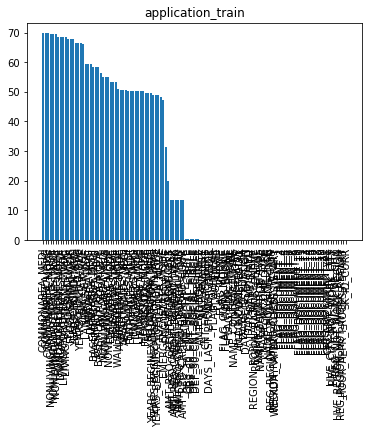

,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932


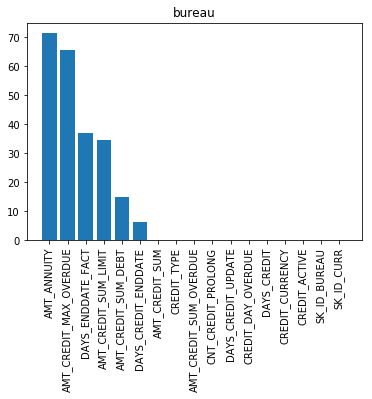

,Total,Percent
STATUS,0,0.0
MONTHS_BALANCE,0,0.0
SK_ID_BUREAU,0,0.0


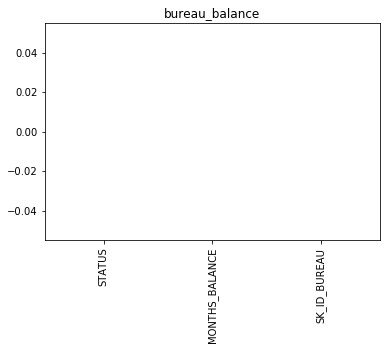

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872


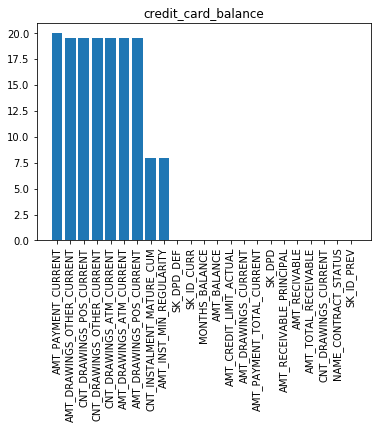

,Total,Percent
AMT_PAYMENT,2905,0.021352
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_INSTALMENT,0,0.000000
DAYS_INSTALMENT,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000


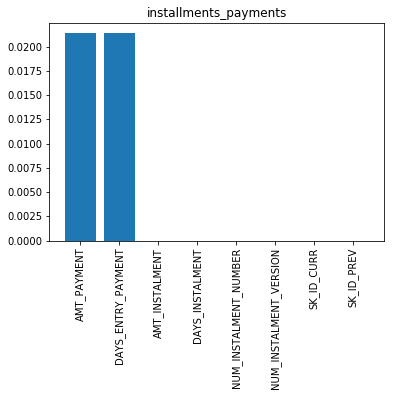

,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_DPD_DEF,0,0.000000
SK_DPD,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000


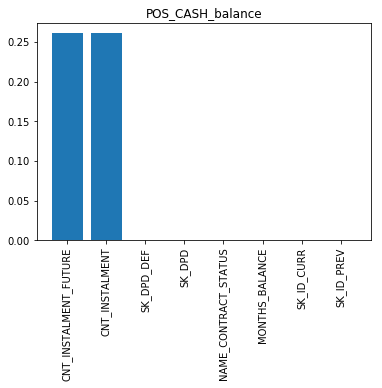

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754


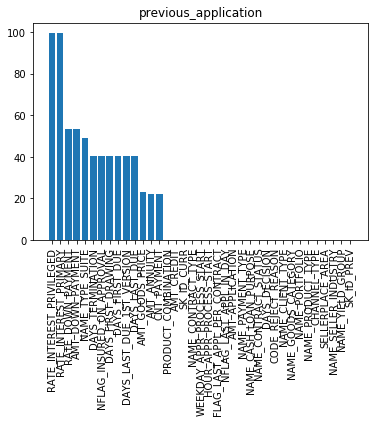

In [18]:
df_types = [application_train,bureau,bureau_balance,credit_card_balance,installments_payments,POS_CASH_balance,previous_application]
names = ['application_train','bureau','bureau_balance','credit_card_balance','installments_payments','POS_CASH_balance','previous_application']

for df_type,name in zip(df_types,names):
    total = df_type.isnull().sum().sort_values(ascending = False)
    percent = (df_type.isnull().sum() / df_type.isnull().count() * 100).sort_values(ascending = False)
    missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    display(missing_df.head())
    
    plt.title('%s'%name)
    plt.bar(range(len(missing_df)), missing_df['Percent'], tick_label=list(missing_df.index))
    plt.xticks(rotation=90)
    plt.show()

### データ観察

#### amt_credit(信用貸金額？)の分布

AMT_CREDIT: ['Credit amount of the loan'
 'Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT']
平均値： 599025.9997057016
中央値： 513531.0
最大値： 4050000.0
最小値： 45000.0


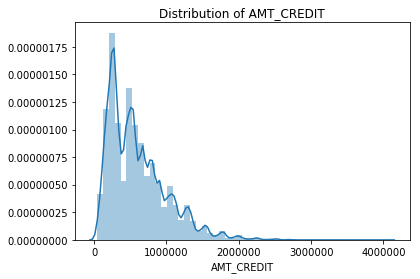

In [19]:
col = 'AMT_CREDIT'
print('{}: {}'.format(col, df_description[df_description['Row']==col]['Description'].values))

plt.title("Distribution of %s"%col)
sns.distplot(application_train[col].dropna().astype('float'))  # 頻度分布（ヒストグラム）

print('平均値： {}'.format(np.mean(application_train[col].dropna().astype('float'))))
print('中央値： {}'.format(np.median(application_train[col].dropna().astype('float'))))
print('最大値： {}'.format(np.max(application_train[col].dropna().astype('float'))))
print('最小値： {}'.format(np.min(application_train[col].dropna().astype('float'))))

# 注意として， 今データは全てobject型で読み込んでいるので，　数値で扱うには型変換が必要
#print(application_train["AMT_CREDIT"].dtype)  # object

AMT_INCOME_TOTAL: ['Income of the client']
平均値： 168797.9192969845
中央値： 147150.0
最大値： 117000000.0
最小値： 25650.0


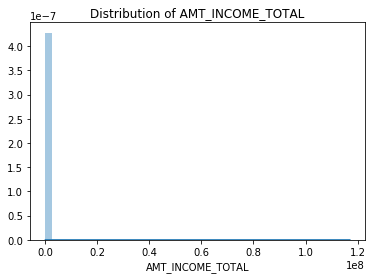

In [20]:
col = 'AMT_INCOME_TOTAL'
print('{}: {}'.format(col, df_description[df_description['Row']==col]['Description'].values))

plt.title("Distribution of %s"%col)
sns.distplot(application_train[col].dropna().astype('float'))  # 頻度分布（ヒストグラム）

print('平均値： {}'.format(np.mean(application_train[col].dropna().astype('float'))))
print('中央値： {}'.format(np.median(application_train[col].dropna().astype('float'))))
print('最大値： {}'.format(np.max(application_train[col].dropna().astype('float'))))
print('最小値： {}'.format(np.min(application_train[col].dropna().astype('float'))))

AMT_INCOME_TOTAL: ['Income of the client']


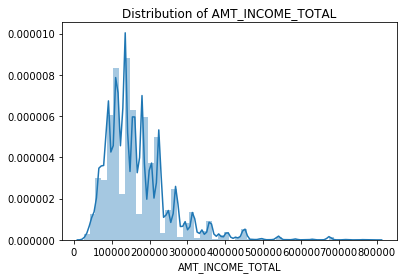

In [21]:
# 上記の収入の横軸のスケールを変えてプロット

col = 'AMT_INCOME_TOTAL'
print('{}: {}'.format(col, df_description[df_description['Row']==col]['Description'].values))

plt.title("Distribution of %s"%col)
income = application_train[col].dropna().astype('float')
sns.distplot(income[income < 800000])  # 頻度分布（ヒストグラム） 

NAME_TYPE_SUITE: ['Who was accompanying client when he was applying for the loan'
 'Who accompanied client when applying for the previous application']


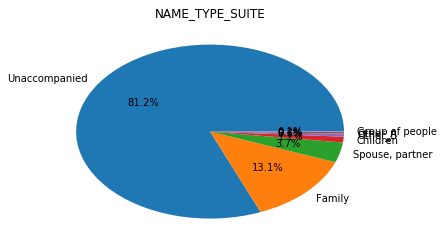

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [22]:
# 申し込んだ時に，　連れ添っていたのは誰か？
col = 'NAME_TYPE_SUITE'
print('{}: {}'.format(col, df_description[df_description['Row']==col]['Description'].values))

plt.title('%s'%col)
plt.pie(application_train[col].value_counts(), labels=list(application_train[col].value_counts().index),autopct="%.1f%%")
plt.show()

application_train[col].value_counts()

TARGET: ['Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)']


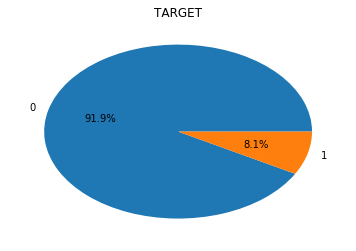

0    282686
1     24825
Name: TARGET, dtype: int64

In [23]:
# ちゃんとloanを返したかどうか？　（今回の目的変数）
col = 'TARGET'
print('{}: {}'.format(col, df_description[df_description['Row']==col]['Description'].values))

plt.title('%s'%col)
plt.pie(application_train[col].value_counts(), labels=list(application_train[col].value_counts().index),autopct="%.1f%%")
plt.show()

application_train[col].value_counts()

NAME_CONTRACT_TYPE: ['Identification if loan is cash or revolving'
 'Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application']


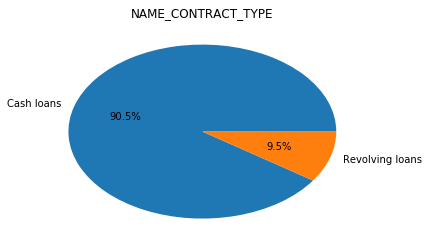

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [24]:
# loanの契約タイプ
col = 'NAME_CONTRACT_TYPE'
print('{}: {}'.format(col, df_description[df_description['Row']==col]['Description'].values))

plt.title('%s'%col)
plt.pie(application_train[col].value_counts(), labels=list(application_train[col].value_counts().index),autopct="%.1f%%")
plt.show()

application_train[col].value_counts()

NAME_INCOME_TYPE: ['Clients income type (businessman, working, maternity leave,)']


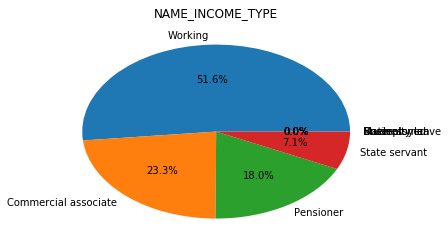

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [25]:
# 申込者の収入タイプ
col = 'NAME_INCOME_TYPE'
print('{}: {}'.format(col, df_description[df_description['Row']==col]['Description'].values))

plt.title('%s'%col)
plt.pie(application_train[col].value_counts(), labels=list(application_train[col].value_counts().index),autopct="%.1f%%")
plt.show()

application_train[col].value_counts()

FLAG_OWN_CAR: ['Flag if the client owns a car']


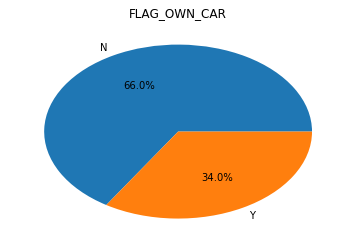

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [26]:
# 車を持っているか？
col = 'FLAG_OWN_CAR'
print('{}: {}'.format(col, df_description[df_description['Row']==col]['Description'].values))

plt.title('%s'%col)
plt.pie(application_train[col].value_counts(), labels=list(application_train[col].value_counts().index),autopct="%.1f%%")
plt.show()

application_train[col].value_counts()

FLAG_OWN_REALTY: ['Flag if client owns a house or flat']


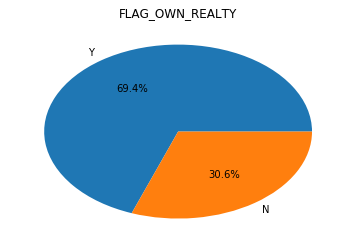

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [27]:
# 家を持っているか？
col = 'FLAG_OWN_REALTY'
print('{}: {}'.format(col, df_description[df_description['Row']==col]['Description'].values))

plt.title('%s'%col)
plt.pie(application_train[col].value_counts(), labels=list(application_train[col].value_counts().index),autopct="%.1f%%")
plt.show()

application_train[col].value_counts()

NAME_FAMILY_STATUS: ['Family status of the client']


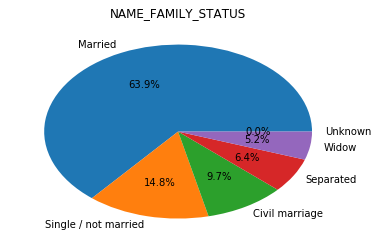

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [28]:
# 既婚者かとか？
col = 'NAME_FAMILY_STATUS'
print('{}: {}'.format(col, df_description[df_description['Row']==col]['Description'].values))

plt.title('%s'%col)
plt.pie(application_train[col].value_counts(), labels=list(application_train[col].value_counts().index),autopct="%.1f%%")
plt.show()

application_train[col].value_counts()

OCCUPATION_TYPE: ['What kind of occupation does the client have']


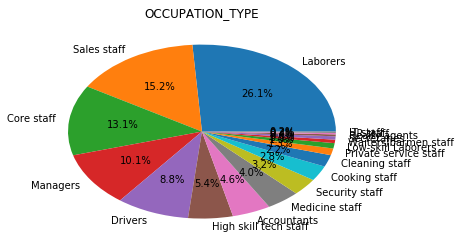

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [29]:
# 申込者の職種
col = 'OCCUPATION_TYPE'
print('{}: {}'.format(col, df_description[df_description['Row']==col]['Description'].values))

plt.title('%s'%col)
plt.pie(application_train[col].value_counts(), labels=list(application_train[col].value_counts().index),autopct="%.1f%%")
plt.show()

application_train[col].value_counts()

NAME_EDUCATION_TYPE: ['Level of highest education the client achieved']


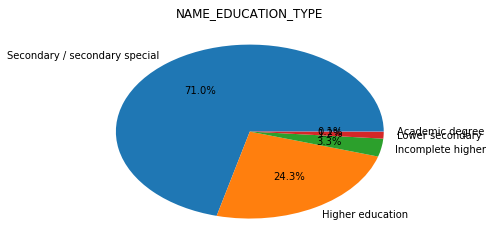

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [30]:
# 申込者の教育経歴
col = 'NAME_EDUCATION_TYPE'
print('{}: {}'.format(col, df_description[df_description['Row']==col]['Description'].values))

plt.title('%s'%col)
plt.pie(application_train[col].value_counts(), labels=list(application_train[col].value_counts().index),autopct="%.1f%%")
plt.show()

application_train[col].value_counts()

NAME_HOUSING_TYPE: ['What is the housing situation of the client (renting, living with parents, ...)']


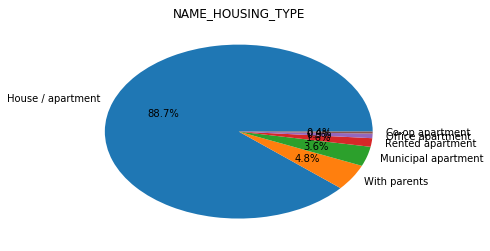

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [31]:
# 申込者の住んでいる家の種類
col = 'NAME_HOUSING_TYPE'
print('{}: {}'.format(col, df_description[df_description['Row']==col]['Description'].values))

plt.title('%s'%col)
plt.pie(application_train[col].value_counts(), labels=list(application_train[col].value_counts().index),autopct="%.1f%%")
plt.show()

application_train[col].value_counts()

ORGANIZATION_TYPE: ['Type of organization where client works']


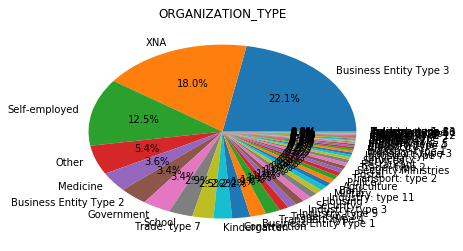

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [32]:
# 申込者が働いている組織
col = 'ORGANIZATION_TYPE'
print('{}: {}'.format(col, df_description[df_description['Row']==col]['Description'].values))

plt.title('%s'%col)
plt.pie(application_train[col].value_counts(), labels=list(application_train[col].value_counts().index),autopct="%.1f%%")
plt.show()

application_train[col].value_counts()

### 他のテーブルのカラムとかの情報
    
    - 今回は省略

### ローンを返したかどうか（目的変数）と，各カラムの関係

NAME_INCOME_TYPE: ['Clients income type (businessman, working, maternity leave,)']


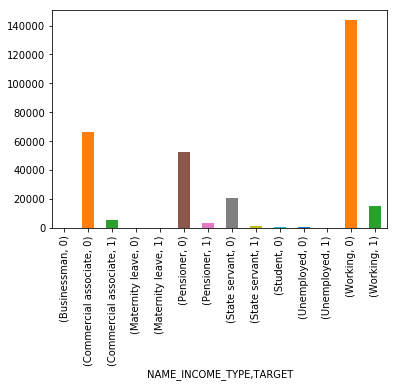

NAME_INCOME_TYPE      TARGET
Businessman           0             10
Commercial associate  0          66257
                      1           5360
Maternity leave       0              3
                      1              2
Pensioner             0          52380
                      1           2982
State servant         0          20454
                      1           1249
Student               0             18
Unemployed            0             14
                      1              8
Working               0         143550
                      1          15224
Name: TARGET, dtype: int64

In [33]:
# 申込者の収入タイプ
col = 'NAME_INCOME_TYPE'
print('{}: {}'.format(col, df_description[df_description['Row']==col]['Description'].values))

count = application_train.groupby(col)['TARGET'].value_counts()
count.plot.bar()
plt.show()

# うまく棒グラフで描きたかったが．．．（失敗）
#plt.bar(range(len(list(count.loc[:,'0',:].index))), list(count.loc[:,'0',:].values), tick_label=list(count.loc[:,'0',:].index))
#plt.bar(range(len(list(count.loc[:,'1',:].index))), list(count.loc[:,'1',:].values), tick_label=list(count.loc[:,'1',:].index))
#plt.xticks(rotation=90)
#plt.show()

count

FLAG_OWN_CAR: ['Flag if the client owns a car']


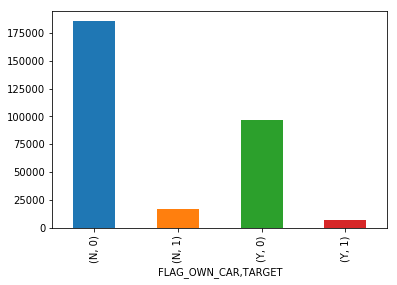

FLAG_OWN_CAR  TARGET
N             0         185675
              1          17249
Y             0          97011
              1           7576
Name: TARGET, dtype: int64

In [34]:
# 車を持っているか
col = 'FLAG_OWN_CAR'
print('{}: {}'.format(col, df_description[df_description['Row']==col]['Description'].values))

count = application_train.groupby(col)['TARGET'].value_counts()
count.plot.bar()
plt.show()

count

FLAG_OWN_REALTY: ['Flag if client owns a house or flat']


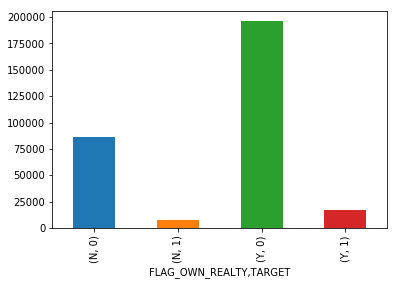

FLAG_OWN_REALTY  TARGET
N                0          86357
                 1           7842
Y                0         196329
                 1          16983
Name: TARGET, dtype: int64

In [35]:
# 家を持っているか
col = 'FLAG_OWN_REALTY'
print('{}: {}'.format(col, df_description[df_description['Row']==col]['Description'].values))

count = application_train.groupby(col)['TARGET'].value_counts()
count.plot.bar()
plt.show()

count

OCCUPATION_TYPE: ['What kind of occupation does the client have']


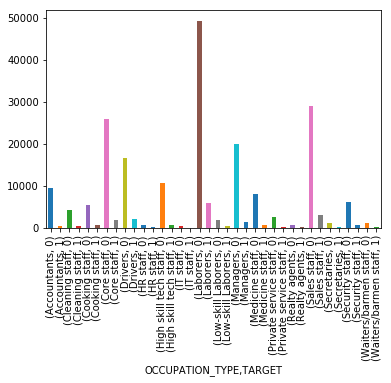

OCCUPATION_TYPE        TARGET
Accountants            0          9339
                       1           474
Cleaning staff         0          4206
                       1           447
Cooking staff          0          5325
                       1           621
Core staff             0         25832
                       1          1738
Drivers                0         16496
                       1          2107
HR staff               0           527
                       1            36
High skill tech staff  0         10679
                       1           701
IT staff               0           492
                       1            34
Laborers               0         49348
                       1          5838
Low-skill Laborers     0          1734
                       1           359
Managers               0         20043
                       1          1328
Medicine staff         0          7965
                       1           572
Private service staff  0          

In [ ]:
# 職種
col = 'OCCUPATION_TYPE'
print('{}: {}'.format(col, df_description[df_description['Row']==col]['Description'].values))

count = application_train.groupby(col)['TARGET'].value_counts()
count.plot.bar()
plt.show()

count